In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  n_features=64,
                  centers=10,
                  center_box=(-1, +1))

print(X.shape, y.shape)

(1000, 64) (1000,)


In [3]:
X[0]

array([-0.52838609,  0.71899643,  2.71963826,  0.43867226,  0.04202255,
        0.90284769,  0.71509584,  0.02594256,  1.25711429,  0.3272317 ,
        1.18496268, -2.02117603, -0.48813696,  1.47493428, -1.9815772 ,
        0.28982518, -0.5721165 , -0.84501355, -0.53190149,  0.91775426,
       -0.06961839,  1.65638779, -0.53565139, -0.45656985,  2.03847615,
        1.2702813 ,  1.77501455, -0.91951196, -1.31662303, -0.16914912,
        0.03915431, -1.23772246,  1.12668896,  1.17068926, -2.69454367,
        0.76601967,  0.26434462,  1.39138532, -0.95428887, -0.09816183,
        0.45993693, -0.34350864, -0.46995651,  0.21732271, -1.18222454,
       -1.78921001, -0.54885242, -0.02429568, -1.53881742,  0.25935631,
       -0.5651015 , -1.53571029, -0.94062142, -0.28592645,  1.08909897,
       -0.87128331,  0.51222545, -1.00945051,  0.38415207,  0.90649835,
        0.10546996,  0.84280376,  2.5919227 , -0.39278108])

In [4]:
y[0:5]

array([7, 8, 3, 9, 9])

### Visualize

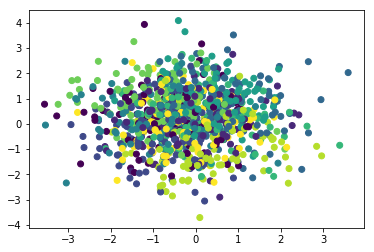

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel())

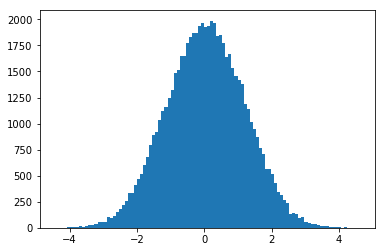

In [6]:
X.mean(), X.min(), X.max()

plt.hist(X.ravel(), bins=100)

tmp = 3

## Preprocessing

### One Hot Encode Label

In [7]:
y_hot = np.eye(10)[y]

print(y.shape, y_hot.shape)
y_hot[:10]

(1000,) (1000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

## Define Activate Functions

### Sigmoid

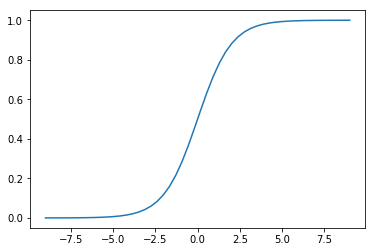

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(-9, +9)
yy = sigmoid(xx)

plt.plot(xx, yy)

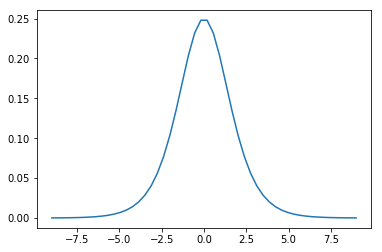

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(-9, +9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

### tanh

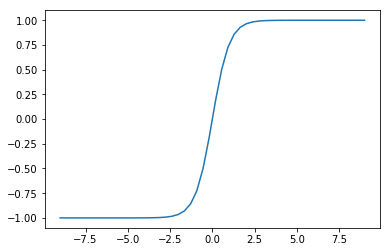

In [10]:
def tanh(x):
    return np.tanh(x)

xx = np.linspace(-9, +9)
yy = tanh(xx)

plt.plot(xx, yy)

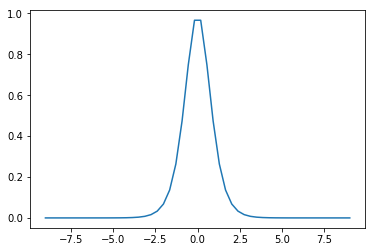

In [11]:
def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2

xx = np.linspace(-9, +9)
yy = tanh_derivative(xx)

plt.plot(xx, yy)

### ReLU

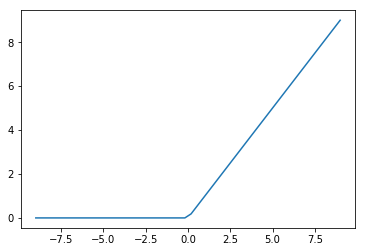

In [12]:
def relu(n):
    return n * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu(xx)

plt.plot(xx, yy)

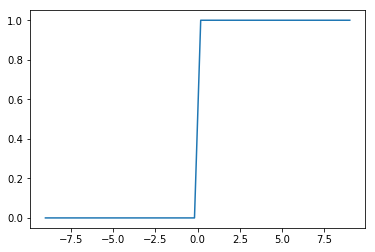

In [13]:
def relu_derivative(n):
    return 1 * (n > 0)

xx = np.linspace(start=-9, stop=+9)
yy = relu_derivative(xx)

plt.plot(xx, yy)

### Cross Entropy

In [14]:
def cross_entropy(actual, predict, eps=1e-15):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Plot

In [15]:
def plot_a(as_, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=9)
    figure.set_size_inches(24, 4)

    axes[0].hist(as_[0].ravel(), bins=100, range=range_)
    axes[1].hist(as_[1].ravel(), bins=100, range=range_)
    axes[2].hist(as_[2].ravel(), bins=100, range=range_)
    axes[3].hist(as_[3].ravel(), bins=100, range=range_)
    axes[4].hist(as_[4].ravel(), bins=100, range=range_)
    axes[5].hist(as_[5].ravel(), bins=100, range=range_)
    axes[6].hist(as_[6].ravel(), bins=100, range=range_)
    axes[7].hist(as_[7].ravel(), bins=100, range=range_)
    axes[8].hist(as_[8].ravel(), bins=100, range=range_)

In [16]:
def plot_dzs(dzs, range_=None):
    figure, axes = plt.subplots(nrows=1, ncols=8)
    figure.set_size_inches(24, 4)

    axes[0].hist(dzs[0].ravel(), bins=100, range=range_)
    axes[1].hist(dzs[1].ravel(), bins=100, range=range_)
    axes[2].hist(dzs[2].ravel(), bins=100, range=range_)
    axes[3].hist(dzs[3].ravel(), bins=100, range=range_)
    axes[4].hist(dzs[4].ravel(), bins=100, range=range_)
    axes[5].hist(dzs[5].ravel(), bins=100, range=range_)
    axes[6].hist(dzs[6].ravel(), bins=100, range=range_)
    axes[7].hist(dzs[7].ravel(), bins=100, range=range_)

### Build a Model

In [17]:
from time import time

def train(X, y, num_epoch, learning_rate, weight_initializer, activation, activation_derivative):
    w1 = weight_initializer(64, 100)
    w2 = weight_initializer(100, 100)
    w3 = weight_initializer(100, 100)
    w4 = weight_initializer(100, 100)
    w5 = weight_initializer(100, 100)
    w6 = weight_initializer(100, 100)
    w7 = weight_initializer(100, 100)
    w8 = weight_initializer(100, 100)
    w9 = weight_initializer(100, 10)
    
    b1 = np.zeros((1, 100))
    b2 = np.zeros((1, 100))
    b3 = np.zeros((1, 100))
    b4 = np.zeros((1, 100))
    b5 = np.zeros((1, 100))
    b6 = np.zeros((1, 100))
    b7 = np.zeros((1, 100))
    b8 = np.zeros((1, 100))
    b9 = np.zeros((1, 10))

    history = []
    start = time()
    
    for epoch in range(num_epoch):
        z1 = X.dot(w1) + b1
        a1 = activation(z1)
        z2 = a1.dot(w2) + b2
        a2 = activation(z2)
        z3 = a2.dot(w3) + b3
        a3 = activation(z3)
        z4 = a3.dot(w4) + b4
        a4 = activation(z4)
        z5 = a4.dot(w5) + b5
        a5 = activation(z5)

        z6 = a5.dot(w6) + b6
        a6 = activation(z6)
        z7 = a6.dot(w7) + b7
        a7 = activation(z7)
        z8 = a7.dot(w8) + b8
        a8 = activation(z8)
        z9 = a8.dot(w9) + b9
        a9 = sigmoid(z9)

        y_predict = np.argmax(a9, axis=1)
        accuracy = (y_predict == y).mean()
        
        loss = cross_entropy(y_hot, a9)

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        if epoch % (num_epoch / 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        if accuracy > 0.99:
            break

        d9 = (a9 - y_hot)

        d8 = d9.dot(w9.T) * activation_derivative(a8)
        d7 = d8.dot(w8.T) * activation_derivative(a7)
        d6 = d7.dot(w7.T) * activation_derivative(a6)
        d5 = d6.dot(w6.T) * activation_derivative(a5)
        d4 = d5.dot(w5.T) * activation_derivative(a4)
        d3 = d4.dot(w4.T) * activation_derivative(a3)
        d2 = d3.dot(w3.T) * activation_derivative(a2)
        d1 = d2.dot(w2.T) * activation_derivative(a1)

        w9 = w9 - learning_rate * a8.T.dot(d9)
        w8 = w8 - learning_rate * a7.T.dot(d8)
        w7 = w7 - learning_rate * a6.T.dot(d7) 
        w6 = w6 - learning_rate * a5.T.dot(d6)
        w5 = w5 - learning_rate * a4.T.dot(d5)
        w4 = w4 - learning_rate * a3.T.dot(d4)
        w3 = w3 - learning_rate * a2.T.dot(d3) 
        w2 = w2 - learning_rate * a1.T.dot(d2)
        w1 = w1 - learning_rate * X.T.dot(d1)

        b9 = b9 - d9.mean(axis=0)
        b8 = b8 - d8.mean(axis=0)
        b7 = b7 - d7.mean(axis=0)
        b6 = b6 - d6.mean(axis=0)
        b5 = b5 - d5.mean(axis=0)
        b4 = b4 - d4.mean(axis=0)
        b3 = b3 - d3.mean(axis=0)
        b2 = b2 - d2.mean(axis=0)
        b1 = b1 - d1.mean(axis=0)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
   
    dz2 = activation_derivative(z1).dot(w2) # dz2 / dz1
    dz3 = activation_derivative(z2).dot(w3) # dz3 / dz2
    dz4 = activation_derivative(z3).dot(w4) # dz4 / dz3
    dz5 = activation_derivative(z4).dot(w5) # dz5 / dz4
    dz6 = activation_derivative(z5).dot(w6) # dz6 / dz5
    dz7 = activation_derivative(z6).dot(w7) # dz7 / dz6
    dz8 = activation_derivative(z7).dot(w8) # dz8 / dz7
    dz9 = activation_derivative(z8).dot(w9) # dz9 / dz8
    
    as_ = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
    dzs = [dz2, dz3, dz4, dz5, dz6, dz7, dz8, dz9]

    return accuracy, as_, dzs, history


### Case 1 - Small Random Number + Sigmoid

In [18]:
# Write code here!
def small_random_number(fan_in, fan_out):
    return np.random.uniform(-1.0, +1.0, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, sigmoid_history = train(X, y, num_epoch, learning_rate,
                                            weight_initializer=small_random_number,
                                            activation=sigmoid,
                                            activation_derivative=sigmoid_derivative)

  0 accuracy = 0.10000, loss = 1.68273


/Users/jinhohyeon/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


 10 accuracy = 0.10000, loss = 0.35363
 20 accuracy = 0.15200, loss = 0.32686
 30 accuracy = 0.20000, loss = 0.30713
 40 accuracy = 0.10000, loss = 0.42704
 50 accuracy = 0.18700, loss = 0.30376
 60 accuracy = 0.18900, loss = 0.30389
 70 accuracy = 0.18600, loss = 0.30560
 80 accuracy = 0.19900, loss = 0.30689
 90 accuracy = 0.18300, loss = 0.29694
----------------------------------------
 99 accuracy = 0.18600, loss = 0.29673


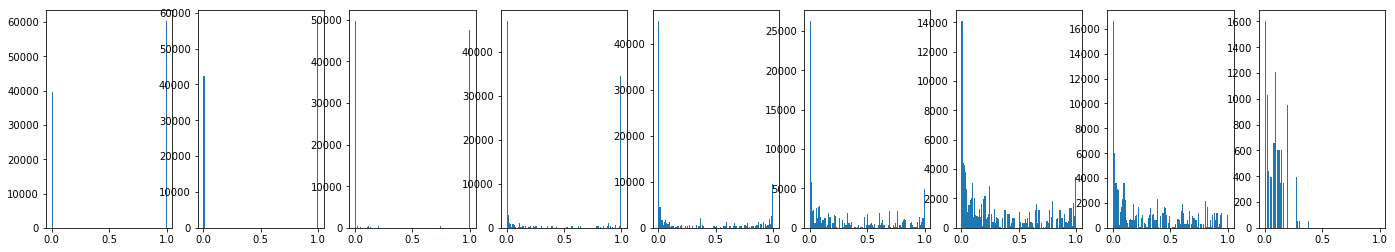

In [19]:
plot_a(as_, range_=(0.0, 1.0))

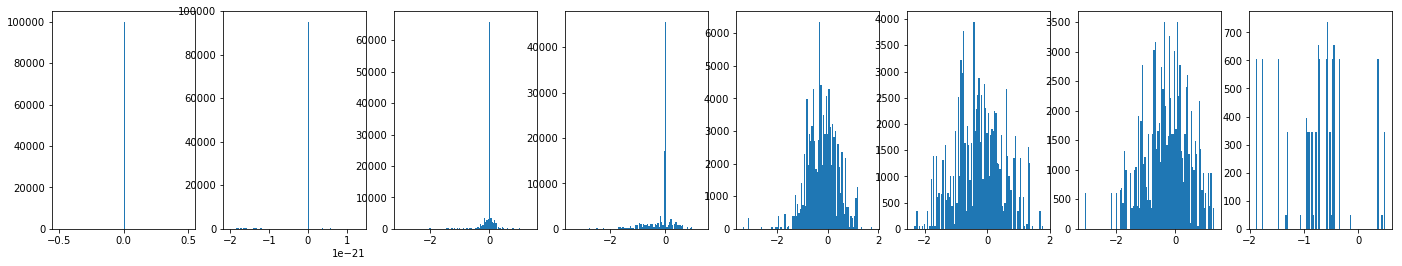

In [20]:
plot_dzs(dzs)

### Case 2 - Small Random Number + tanh

In [21]:
# Write code here!

# Write code here!
def small_random_number(fan_in, fan_out):
    return np.random.uniform(-1.0, +1.0, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, tanh_history = train(X, y, num_epoch, learning_rate,
                                            weight_initializer=small_random_number,
                                            activation=tanh,
                                            activation_derivative=tanh_derivative)

  0 accuracy = 0.09000, loss = 2.26879
 10 accuracy = 0.10000, loss = 1.79679
 20 accuracy = 0.10000, loss = 1.09977
 30 accuracy = 0.11400, loss = 1.18326
 40 accuracy = 0.10000, loss = 1.03036
 50 accuracy = 0.10000, loss = 1.63798
 60 accuracy = 0.10000, loss = 1.16282
 70 accuracy = 0.10000, loss = 1.78679
 80 accuracy = 0.10000, loss = 0.85802
 90 accuracy = 0.10000, loss = 1.00916
----------------------------------------
 99 accuracy = 0.10000, loss = 1.19310


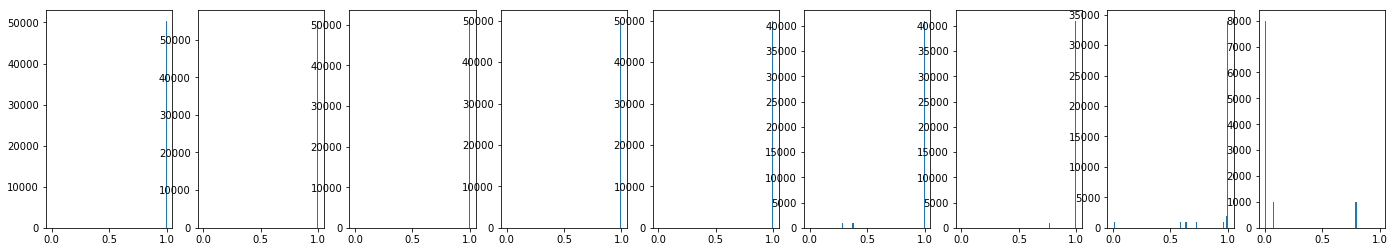

In [22]:
plot_a(as_, range_=(0.0, 1.0))

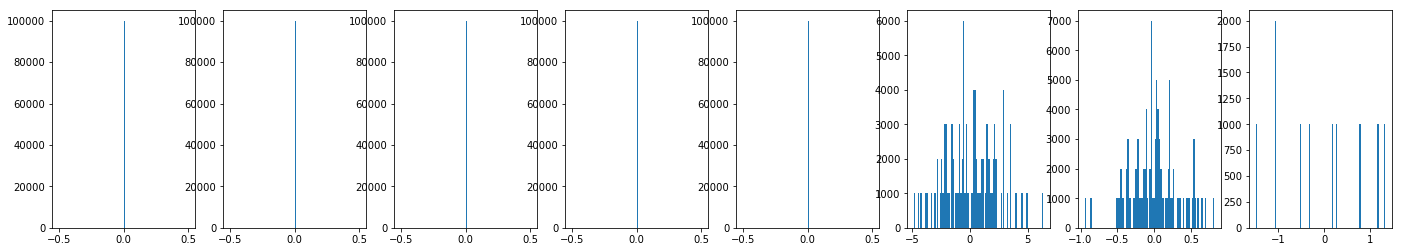

In [23]:
plot_dzs(dzs)

### Case 3 - Xavior Initialization + tanh

In [24]:
# Write code here!

def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    
    return np.random.uniform(low=-a, high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, xavior_tanh_history = train(X, y, num_epoch, learning_rate,
                                         weight_initializer=xavior_initialization,
                                         activation=tanh,
                                         activation_derivative=tanh_derivative)

  0 accuracy = 0.04500, loss = 0.72746
 10 accuracy = 0.60800, loss = 0.20979
 20 accuracy = 0.99200, loss = 0.05212
----------------------------------------
 20 accuracy = 0.99200, loss = 0.05212


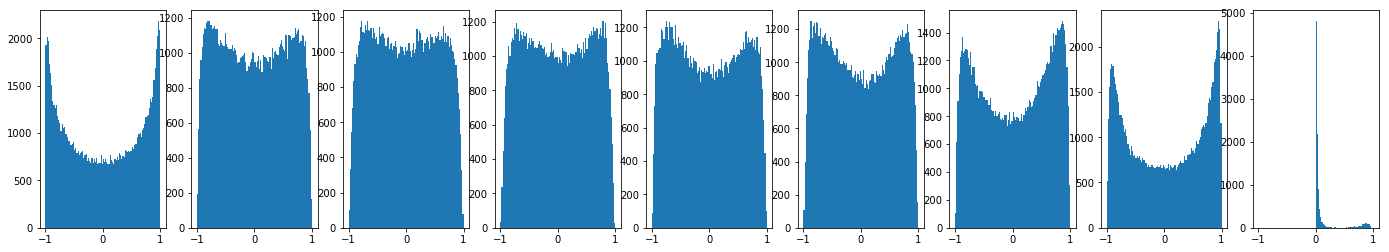

In [25]:
plot_a(as_, range_=(-1.0, 1.0))

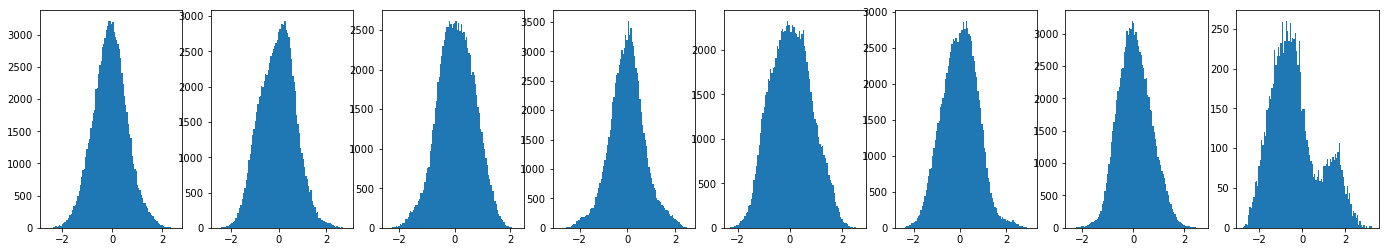

In [26]:
plot_dzs(dzs)

### Visualize

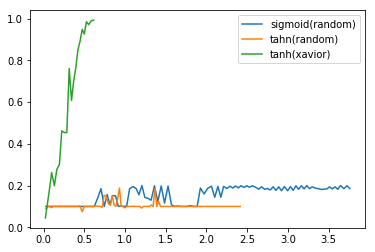

In [27]:
# Write code here!

import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)

plt.plot(sigmoid_history['elapsed'], sigmoid_history['accuracy'], label='sigmoid(random)')
plt.plot(tanh_history['elapsed'], tanh_history['accuracy'], label='tahn(random)')
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label='tanh(xavior)')

plt.legend()

### Case 4 - Xavior Initialization + ReLU

In [40]:
# Write code here!

def xavior_initialization(fan_in, fan_out):
    a = np.sqrt(6 / (fan_in + fan_out))
    
    return np.random.uniform(low=-a, high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.0003

accuracy, as_, dzs, xavior_relu_history = train(X, y, num_epoch, learning_rate,
                                         weight_initializer=xavior_initialization,
                                         activation=relu,
                                         activation_derivative=relu_derivative)

  0 accuracy = 0.11600, loss = 0.68577
 10 accuracy = 0.36300, loss = 0.32058
 20 accuracy = 0.10000, loss = 0.36982
 30 accuracy = 0.40400, loss = 0.28513
 40 accuracy = 0.32000, loss = 0.29770
 50 accuracy = 0.57800, loss = 0.18708
 60 accuracy = 0.38000, loss = 0.24057
 70 accuracy = 0.49400, loss = 0.21466
 80 accuracy = 0.52100, loss = 0.21729
 90 accuracy = 0.64800, loss = 0.16668
----------------------------------------
 99 accuracy = 0.70300, loss = 0.12916


### Case 5 - He Initialization + ReLU

In [45]:
# Write code here!

def he_initialization(fan_in, fan_out):
    a = np.sqrt(6 / fan_in)
    
    return np.random.uniform(low=-a, high=+a, size=(fan_in, fan_out))

num_epoch = 100
learning_rate = 0.00005

accuracy, as_, dzs, he_relu_history = train(X, y, num_epoch, learning_rate,
                                            weight_initializer=he_initialization,
                                            activation=relu,
                                            activation_derivative=relu_derivative)

  0 accuracy = 0.10000, loss = 1.42308
 10 accuracy = 0.28800, loss = 0.30821
 20 accuracy = 0.42000, loss = 0.26954
 30 accuracy = 0.57300, loss = 0.24048
 40 accuracy = 0.66800, loss = 0.18407
 50 accuracy = 0.63900, loss = 0.17240
 60 accuracy = 0.71300, loss = 0.13555
 70 accuracy = 0.94200, loss = 0.04934
 80 accuracy = 0.93100, loss = 0.04480
 90 accuracy = 0.98300, loss = 0.01753
----------------------------------------
 99 accuracy = 0.98900, loss = 0.01247


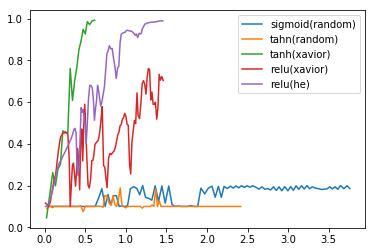

In [47]:
import pandas as pd

sigmoid_history = pd.DataFrame(sigmoid_history)
tanh_history = pd.DataFrame(tanh_history)
xavior_tanh_history = pd.DataFrame(xavior_tanh_history)
xavior_relu_history = pd.DataFrame(xavior_relu_history)
he_relu_history = pd.DataFrame(he_relu_history)

plt.plot(sigmoid_history['elapsed'], sigmoid_history['accuracy'], label='sigmoid(random)')
plt.plot(tanh_history['elapsed'], tanh_history['accuracy'], label='tahn(random)')
plt.plot(xavior_tanh_history['elapsed'], xavior_tanh_history['accuracy'], label='tanh(xavior)')
plt.plot(xavior_relu_history['elapsed'], xavior_relu_history['accuracy'], label='relu(xavior)')
plt.plot(he_relu_history['elapsed'], he_relu_history['accuracy'], label='relu(he)')

plt.legend()

### Visualize

In [30]:
# Write code here!